<a href="https://colab.research.google.com/github/latasyamh/Tugas_Python/blob/main/TUGAS_14_LATASYA_MAGHRIFTA_HERRAWAN_(1101194042).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*  LATASYA MAGHRIFTA HERRAWAN
*   1101194042
*   TT-43-G11






In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
frek=1800 #MHz
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [4]:
LpUrban=cos(frek, 'urban', tower, user, d)
LpSuburban=cos(frek, 'suburban', tower, user, d)
LpOpen=cos(frek, 'open', tower, user, d)

In [5]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

In [6]:
frek1= 700 #mhz
frek2= 900 #mhz
frek3= 1800 #mhz
loc= 'urban'
LpUrban1=cos(frek1, loc, tower, user, d)
LpUrban2=cos(frek2, loc, tower, user, d)
LpUrban3=cos(frek3, loc, tower, user, d)

In [7]:
d_sort=d[np.argsort(d)]
Urban1_sort=LpUrban1[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]

In [8]:
def daya_terima (pt,pl,gt,gx):
  #Ubah ke dBm
  ptx=10*np.log10(pt)

  #Hitung Daya Terima 
  prxl= ptx-pl+gt+gx

  #Ubah ke Miliwatt 
  prx=10**(prxl/10)

  return prx 
  

In [9]:
pt=30000 #miliwatt
gt=10 #dB
gx=2 #dB

prxurban= daya_terima (pt,Urban_sort,gt,gx)
prxsuburban= daya_terima(pt,Suburban_sort,gt,gx)
prxopen= daya_terima(pt,Open_sort,gt,gx)


In [10]:
prxurban1= daya_terima(pt,Urban1_sort,gt,gx)
prxurban2= daya_terima(pt,Urban2_sort,gt,gx)
prxurban3= daya_terima(pt,Urban3_sort,gt,gx)

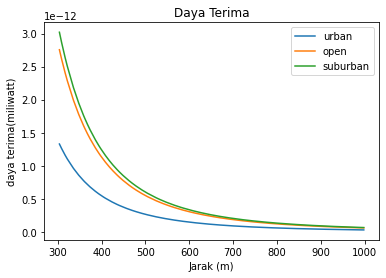

In [11]:

plt.figure()
plt.title("Daya Terima")
plt.plot(d_sort,prxurban, label = "urban")
plt.plot(d_sort,prxopen, label = "open")
plt.plot(d_sort,prxsuburban, label = "suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('daya terima(miliwatt)')
plt.legend()
plt.show()

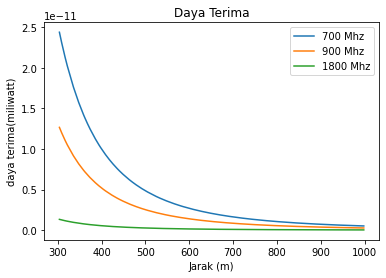

In [12]:

plt.figure()
plt.title("Daya Terima")
plt.plot(d_sort,prxurban1, label = "700 Mhz")
plt.plot(d_sort,prxurban2, label = "900 Mhz")
plt.plot(d_sort,prxurban3, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('daya terima(miliwatt)')
plt.legend()
plt.show()

In [13]:
def hSNR (prx,BW):
  #Hitung Noise
  Noise1= -174+(10*np.log10(BW))

  #Ubah Noise 
  Noise= 10**(Noise1/10)

  #Hitung SNR
  SNR= prx/Noise

  return SNR

In [14]:
BW=5000000 #hz
SNRurban= hSNR (prxurban,BW)
SNRsuburban= hSNR(prxsuburban,BW)
SNRopen= hSNR(prxopen,BW)

In [15]:
SNRurban1 = hSNR(prxurban1,BW)
SNRurban2 = hSNR(prxurban2,BW)
SNRurban3 = hSNR(prxurban3,BW)

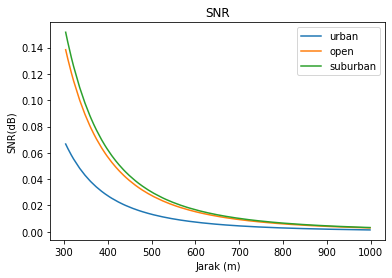

In [16]:
plt.figure()
plt.title("SNR")
plt.plot(d_sort,SNRurban, label = "urban")
plt.plot(d_sort,SNRopen, label = "open")
plt.plot(d_sort,SNRsuburban, label = "suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR(dB)')
plt.legend()
plt.show()

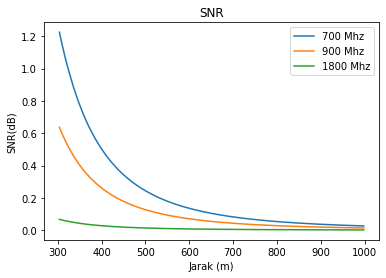

In [17]:
plt.figure()
plt.title("SNR")
plt.plot(d_sort,SNRurban1, label = "700 Mhz")
plt.plot(d_sort,SNRurban2, label = "900 Mhz")
plt.plot(d_sort,SNRurban3, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR(dB)')
plt.legend()
plt.show()

In [18]:
def Kapasitas(SNR,Bw):
  KS= Bw*(np.log2(1+SNR))
  return KS

In [19]:
bw= 5000000 #Hz
KS_Urban=Kapasitas(SNRurban,bw)
KS_Suburban=Kapasitas(SNRsuburban,bw)
KS_Open=Kapasitas(SNRopen,bw)

In [20]:
KS_Urban1=Kapasitas(SNRurban1,bw)
KS_Urban2=Kapasitas(SNRurban2,bw)
KS_Urban3=Kapasitas(SNRurban3,bw)

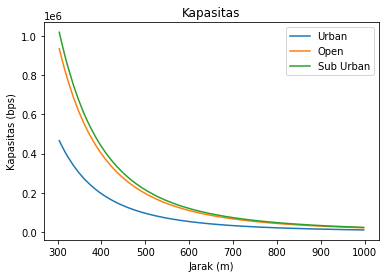

In [21]:
plt.figure()
plt.plot(d_sort,KS_Urban, label='Urban')
plt.plot(d_sort,KS_Open, label='Open')
plt.plot(d_sort,KS_Suburban, label='Sub Urban')
plt.legend()
plt.title('Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

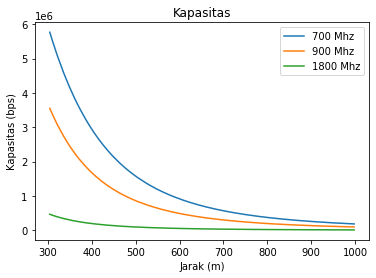

In [22]:
plt.figure()
plt.plot(d_sort,KS_Urban1, label='700 Mhz')
plt.plot(d_sort,KS_Urban2, label='900 Mhz')
plt.plot(d_sort,KS_Urban3, label='1800 Mhz')
plt.legend()
plt.title('Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()